# Clustering and K-Means

```python
from sklearn.cluster import KMeans
```

Clustering adalah teknik pengelompokan data tanpa label (**unsupervised learning**) di mana objek dalam kelompok (cluster) memiliki kesamaan sifat yang tinggi, sementara objek antar-cluster memiliki perbedaan yang signifikan, Tujuannya:
- Memahami struktur data.
- Mengidentifikasi pola tersembunyi.
- Segmentasi (pelanggan, dokumen, gambar).

**Jenis Clustering**:
- **Centroid-based**: K-Means, K-Medoids.
- **Density-based**: DBSCAN.
- **Hierarchical**: Agglomerative Clustering.
- **Distribution-based**: Gaussian Mixture Models (GMM).

## K-Means Clustering

```python
from sklearn.cluster import KMeans
```

- Setiap cluster direpresentasikan oleh **centroid** (titik pusat).
- Algoritma berusaha meminimalkan **inertia** (jumlah kuadrat jarak tiap titik ke centroid).

1. **Pilih Jumlah Cluster (K)**: Misal, K=3.
2. **Inisialisasi Centroid**: Pilih K titik acak sebagai centroid awal.
3. **Assignment Phase**:
   - Setiap titik data dihitung jaraknya ke semua centroid.
   - Titik dialokasikan ke cluster dengan centroid **terdekat** (biasanya *jarak Euclidean*).
   - **Rumus Jarak Euclidean**:
     $$
     d(x, \mu_k) = \sqrt{\sum_{i=1}^n (x_i - \mu_{ki})^2}
     $$
4. **Update Phase**:
   - Hitung ulang centroid sebagai rata-rata semua titik dalam cluster:
     $$
     \mu_k^{(new)} = \frac{1}{|C_k|} \sum_{x \in C_k} x
     $$
5. **Iterasi**: Ulangi langkah 2 sampai n-1 atau:
   - Centroid tidak berubah.
   - Maksimum iterasi tercapai.

### Inertia (Cluster Quality)

Inertia adalah total **jumlah kuadrat jarak** setiap titik data ke centroid clusternya. Semakin kecil inertia, semakin "padat" cluster.

**Rumus**:

$$
\text{Inertia} = \sum_{i=1}^n \min_{\mu_k} ||x_i - \mu_k||^2
$$

**Interpretasi**:
- Inertia rendah → Cluster rapat (titik dekat dengan centroid).
- Inertia tinggi → Cluster renggang.

**Paradoks Inertia**:
- Jika K = jumlah data → Inertia = 0 (semua titik adalah centroid).
- **Masalah**: Bagaimana memilih K yang optimal?

### Elbow Method

1. Hitung inertia untuk berbagai nilai K (misal: K = 1 hingga K = n-1).
2. Plot **Inertia vs. K**.
3. Cari "siku" (*elbow*) di mana penurunan inertia melambat drastis.

Jika Grafik menurun tajam saat K=1→3, lalu landai saat K>3 → Pilih K=3.

**Keterbatasan**:
- Tidak selalu jelas di mana "siku" berada.
- Subjektif → Butuh metode pelengkap seperti **Silhouette Analysis**.

### Silhouette Analysis

**A. Konsep Cohesion & Separation**
- **Cohesion (a(i))**: Rata-rata jarak titik ke sesama anggota cluster.
  - *Semakin kecil a(i)* → Cluster semakin padat.
- **Separation (b(i))**: Rata-rata jarak titik ke cluster terdekat.
  - *Semakin besar b(i)* → Cluster terpisah dengan baik.

**B. Rumus Silhouette Score**
Untuk satu titik data $ x_i $:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

- **Rentang**: $-1 \leq s(i) \leq 1$.
- **Interpretasi**:
  - $ s(i) \approx 1 $: Titik cocok dengan clusternya.
  - $ s(i) \approx 0 $: Titik berada di perbatasan dua cluster.
  - $ s(i) \approx -1 $: Titik salah cluster.

**Silhouette Score Global**:
Rata-rata $ s(i) $ untuk semua titik.

**C. Analisis Silhouette Plot**
- **Bilah Horizontal**: Menunjukkan distribusi $ s(i) $ tiap cluster.
- **Lebar Bilah**: Semakin lebar → Cluster lebih homogen.
- **Tinggi Rata-Rata**: Semakin tinggi → Kualitas cluster lebih baik.

### Table Evaluation

| Keyword | Definisi | Purpose | Rumus |
|---------|----------|---------|-------|
| **Clustering**| Teknik `unsupervised learning` untuk mengelompokkan data berdasarkan kesamaan. | Memahami struktur data, segmentasi, identifikasi pola.| Tidak ada rumus tunggal; bergantung pada algoritma (K-Means, DBSCAN, Hierarchical).|
| **K-Means** | Algoritma clustering berbasis centroid dengan meminimalkan inertia.| Membagi data ke dalam K cluster yang homogen. | $\mu_k^{(new)} = \frac{1}{\|C_k\|} \sum_{x \in C_k} x$ |
| **Centroid** | Titik pusat cluster (rata-rata semua titik dalam cluster). | Menjadi representasi pusat cluster untuk perhitungan jarak. | $\mu_k = \text{rata-rata titik dalam cluster}$ |
| **Inertia** | Total jumlah kuadrat jarak titik ke centroid clusternya.| Mengukur kepadatan cluster (semakin kecil, semakin baik). | $\text{Inertia} = \sum_{i=1}^n \min_{\mu_k} \|x_i - \mu_k\|^2$  |
| **Silhouette**| Skor yang mengukur seberapa baik titik cocok dengan clusternya. | Menilai kualitas cluster dengan mempertimbangkan cohesion dan separation. | $s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$ |

**1. Clustering vs. K-Means**:
* Clustering adalah konsep umum.
  - Kelebihan:
    - Tidak perlu label.
    - Cocok untuk eksplorasi data.
  - Kekurangan:
    - Subjektif dalam pemilihan jumlah cluster.
    - Sensitif terhadap noise.
* K-Means adalah salah satu algoritmanya.
  - Kelebihan:
    - Cepat dan efisien.
    - Mudah diimplementasikan.
  - Kekurangan
    - Harus tentukan K manual.
    - Sensitif terhadap inisialisasi centroid awal.

**2. Inertia vs. Silhouette**:
* Inertia fokus pada kepadatan cluster.
  - Kelebihan:
    -  Metrik kualitas cluster yang sederhana.
  - Kekurangan:
    -  Tidak bekerja baik untuk cluster non-spherical.
    -  Paradoks K = jumlah data.
* Silhouette mempertimbangkan pemisahan antar-cluster.
  - Kelebihan:
    - Objektif (rentang -1 hingga 1).
    - Mempertimbangkan struktur cluster.
  - Kekurangan
    - Komputasi lebih intensif.
    - Tidak efektif untuk cluster density-based.

**3. Centroid vs. Medoid**:
* Centroid adalah titik rata-rata.
* medoid adalah titik aktual dalam data.

## Raw vs Clean Iris

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [338]:
df_raw = pd.read_csv("data/tugas1/iris_combined.csv")
X_raw = df_raw.drop(columns=["id", "class"])  # Kolom yang tidak digunakan
display(X_raw)

,petal length,petal width,sepal length,sepal width
0,86.4,70.0,20.1,30.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.8,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [339]:
df_clean = pd.read_csv("data/tugas2/iris_KKN-cleaned.csv")
X_clean = df_clean.drop(columns=["id", "class"])
display (X_clean)

,petal length,petal width,sepal length,sepal width
0,1.4,0.2,4.9,3.0
1,1.3,0.2,4.8,3.2
2,1.5,0.2,4.6,3.1
3,1.4,0.2,5.0,3.6
4,1.7,0.4,5.4,3.9
...,...,...,...,...
143,5.2,2.3,6.7,3.0
144,5.0,1.9,6.3,2.5
145,5.2,2.0,6.5,3.0
146,5.4,2.3,6.2,3.4


```python
n_clusters=3       # Jumlah cluster
n_init=10          # Jumlah inisialisasi centroid untuk hindari local optimum
random_state=42    # Untuk reproduktibilitas hasil
```

In [340]:
scaler = StandardScaler()
X_raw_scaled = scaler.fit_transform(X_raw)

results_raw = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_raw_scaled)
    sse = kmeans.inertia_
    silhouette = silhouette_score(X_raw_scaled, labels)
    results_raw[k] = {"SSE": sse, "Silhouette": silhouette}

print("=== Hasil Clustering dengan Outlier ===")
for k, metrics in results_raw.items():
    print(f"K={k}: SSE = {metrics['SSE']:.2f}, Silhouette = {metrics['Silhouette']:.2f}")

=== Hasil Clustering dengan Outlier ===
K=2: SSE = 67.73, Silhouette = 0.96
K=3: SSE = 24.86, Silhouette = 0.51
K=4: SSE = 14.51, Silhouette = 0.47


In [341]:
X_clean_scaled = scaler.fit_transform(X_clean)

results_clean = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_clean_scaled)
    sse = kmeans.inertia_
    silhouette = silhouette_score(X_clean_scaled, labels)
    results_clean[k] = {"SSE": sse, "Silhouette": silhouette}

print("\n=== Hasil Clustering Tanpa Outlier ===")
for k, metrics in results_clean.items():
    print(f"K={k}: SSE = {metrics['SSE']:.2f}, Silhouette = {metrics['Silhouette']:.2f}")


=== Hasil Clustering Tanpa Outlier ===
K=2: SSE = 219.13, Silhouette = 0.58
K=3: SSE = 135.34, Silhouette = 0.46
K=4: SSE = 110.68, Silhouette = 0.41


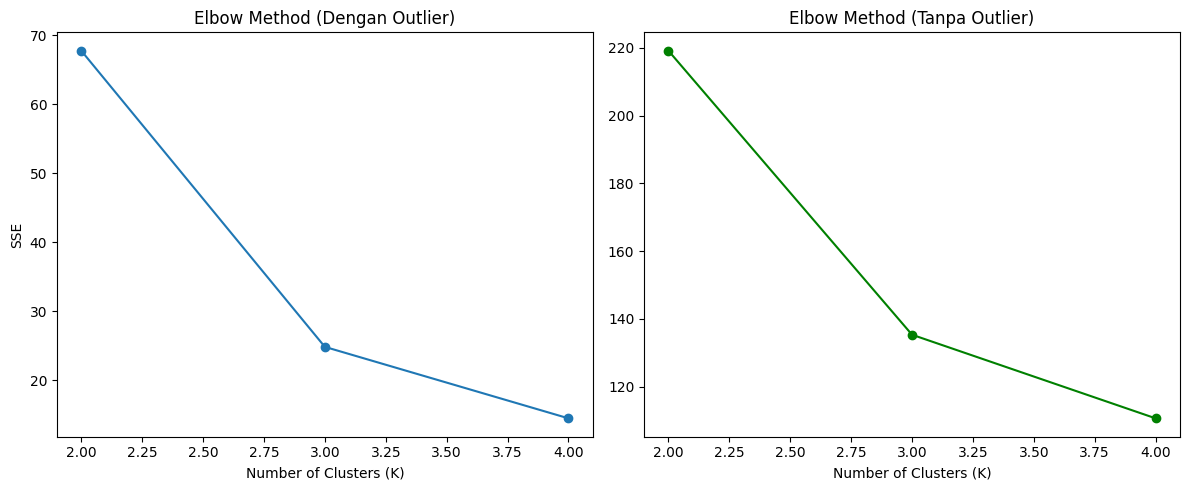

In [342]:
plt.figure(figsize=(12, 5))

# Plot Raw Data
plt.subplot(1, 2, 1)
plt.plot(list(results_raw.keys()), [m["SSE"] for m in results_raw.values()], marker='o')
plt.title("Elbow Method (Dengan Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")

# Plot Clean Data
plt.subplot(1, 2, 2)
plt.plot(list(results_clean.keys()), [m["SSE"] for m in results_clean.values()], marker='o', color='green')
plt.title("Elbow Method (Tanpa Outlier)")
plt.xlabel("Number of Clusters (K)")

plt.tight_layout()
plt.savefig("data/tugas5/assets/elbow_comparison.png")
plt.show()

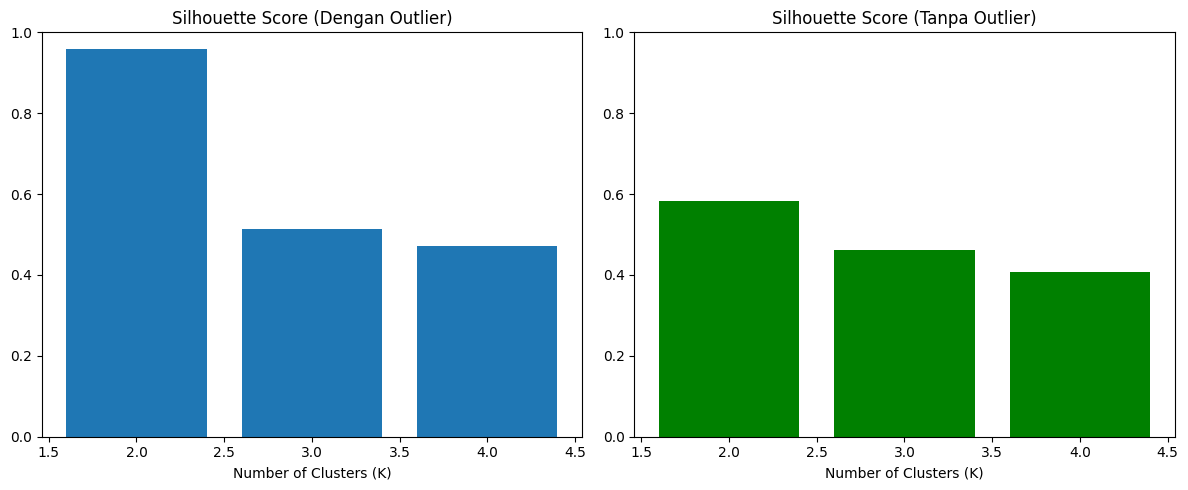

In [343]:
plt.figure(figsize=(12, 5))

# Plot Raw Data
plt.subplot(1, 2, 1)
plt.bar(list(results_raw.keys()), [m["Silhouette"] for m in results_raw.values()])
plt.title("Silhouette Score (Dengan Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylim(0, 1)

# Plot Clean Data
plt.subplot(1, 2, 2)
plt.bar(list(results_clean.keys()), [m["Silhouette"] for m in results_clean.values()], color='green')
plt.title("Silhouette Score (Tanpa Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig("data/tugas5/assets/silhouette_comparison.png")
plt.show()

## Summary

Dengan Outlier:
- SSE lebih tinggi karena outlier meningkatkan jarak ke centroid.
- Silhouette lebih rendah karena outlier mengganggu struktur cluster.
- K optimal mungkin tidak terdeteksi dengan jelas.

Tanpa Outlier:
- SSE lebih rendah dan Silhouette lebih tinggi.
- Pola cluster lebih jelas (misal: K=2 atau K=3 optimal).

### **1. Clustering**
Clustering menggunakan algoritma **K-Means** (unsupervised learning untuk pengelompokan data).
```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
```

### **2. K-Means**
- Algoritma K-Means dijalankan dengan menentukan jumlah cluster (`n_clusters`),
- inisialisasi centroid (`n_init`), dan random state untuk reproduktibilitas.
```python
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
```


### **3. Inertia (SSE)**
Inertia `(Sum of Squared Errors)` diakses melalui atribut `inertia_` dari model K-Means.
```python
sse = kmeans.inertia_  # Inertia = SSE
```

### **4. Silhouette Score**
Skor Silhouette dihitung menggunakan `silhouette_score` dari `sklearn.metrics`.
```python
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_scaled, labels)
```

### **5. Centroid vs Medoid**
- **Centroid**:
  - K-Means menggunakan **centroid** (rata-rata titik dalam cluster).
  - Centroid dapat diakses melalui `cluster_centers_`.
```python
centroids = kmeans.cluster_centers_  # Contoh: cetak centroid untuk K=3
print(centroids)
```

- **Medoid**:
  - Medoid adalah titik *aktual* dalam data yang paling dekat dengan centroid, digunakan di algoritma **K-Medoids**
  - Kode menggunakan K-Means (centroid-based), bukan K-Medoids (medoid-based).

## K-Means Accuracy

In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

In [345]:
df_clean = pd.read_csv("data/tugas2/iris_KKN-cleaned.csv")

# Pisahkan fitur dan kolom non-fitur
X_raw = df_clean.drop(columns=["id", "class"])
non_features = df_clean[["id", "class"]]

# Scaling data
X_raw_scaled = scaler.fit_transform(X_raw)

# Clustering dengan K=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_raw_scaled)

# Gabungkan semua kolom + cluster
final_df = pd.concat([
    non_features.reset_index(drop=True),
    pd.DataFrame(X_raw, columns=X_raw.columns).reset_index(drop=True),
    pd.DataFrame({"cluster": clusters})
], axis=1)

final_df.to_csv("data/tugas5/iris_KMeans-3.csv", index=False)
df = final_df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            148 non-null    int64  
 1   class         148 non-null    object 
 2   petal length  148 non-null    float64
 3   petal width   148 non-null    float64
 4   sepal length  148 non-null    float64
 5   sepal width   148 non-null    float64
 6   cluster       148 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.6+ KB
None


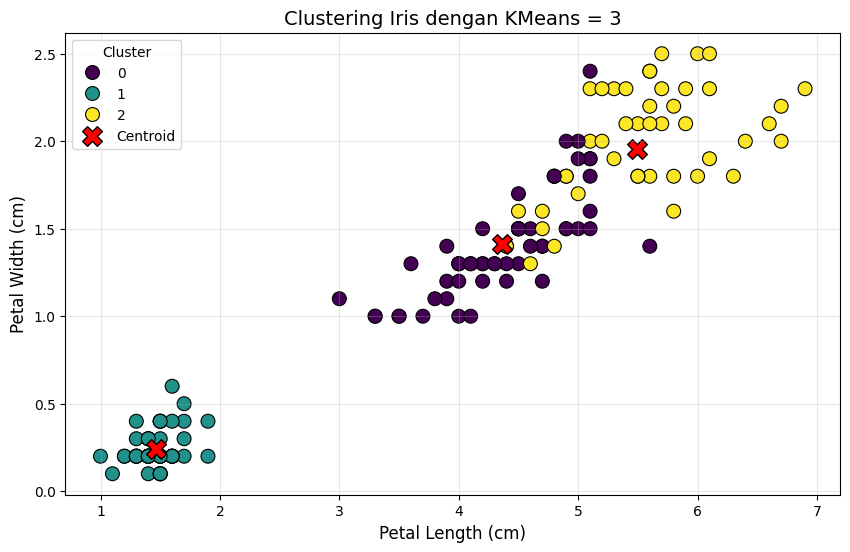

In [346]:
# Plot scatter plot dengan warna cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="petal length",
    y="petal width",
    hue="cluster",
    palette="viridis",
    s=100,
    edgecolor="k"
)

# Tambahkan centroid cluster (dalam skala asli)
centroids = kmeans.cluster_centers_  # Centroid dalam skala scaled
centroids_unscaled = scaler.inverse_transform(centroids)  # Kembalikan ke skala asli
plt.scatter(
    centroids_unscaled[:, 0], # petal length
    centroids_unscaled[:, 1], # petal width
    marker="X",
    s=200,
    c="red",
    label="Centroid",
    edgecolor="k"
)

# Label dan judul
plt.title("Clustering Iris dengan KMeans = 3", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True, alpha=0.3)
plt.savefig("data/tugas5/assets/KMeans_cluster")
plt.show()

In [347]:
class_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
y_true = df['class'].map(class_mapping)
y_cluster = df['cluster']

contingency = confusion_matrix(y_true, y_cluster)
row_ind, col_ind = linear_sum_assignment(-contingency)

cluster_to_class = {
    cluster: list(class_mapping.keys())[class_idx] 
    for class_idx, cluster in zip(row_ind, col_ind)
}

total_samples = len(df)
correct_matches = contingency[row_ind, col_ind].sum()

print(f"[Perhitungan Akurasi]")
print(f"Total data            : {total_samples}")
print(f"Kecocokan optimal     : {correct_matches} data")
print(f"Akurasi               : {correct_matches/total_samples:.4f}")

[Perhitungan Akurasi]
Total data            : 148
Kecocokan optimal     : 122 data
Akurasi               : 0.8243


In [348]:
df["predicted_class"] = df["cluster"].map(cluster_to_class)
mismatches = df[df["class"] != df["predicted_class"]]

print("\n[Tabel Kontingensi]")
contingency_df = pd.DataFrame(
    contingency,
    index=[f"True {name}" for name in class_mapping.keys()],
    columns=[f"Cluster {i}" for i in range(3)]
)
display(contingency_df)


[Tabel Kontingensi]


,Cluster 0,Cluster 1,Cluster 2
True Iris-setosa,0,48,0
True Iris-versicolor,38,0,12
True Iris-virginica,14,0,36


In [349]:
print("[Data yang Salah Klaster]")
display(mismatches[["id", "class", "cluster", "predicted_class"]].head())

[Data yang Salah Klaster]


,id,class,cluster,predicted_class
48,51,Iris-versicolor,2,Iris-virginica
49,52,Iris-versicolor,2,Iris-virginica
50,53,Iris-versicolor,2,Iris-virginica
54,57,Iris-versicolor,2,Iris-virginica
56,59,Iris-versicolor,2,Iris-virginica


In [350]:
error_summary = mismatches.groupby(["class", "cluster", "predicted_class"]).size().reset_index(name='count')
print("[Ringkasan Kesalahan]")
display(error_summary)

[Ringkasan Kesalahan]


,class,cluster,predicted_class,count
0,Iris-versicolor,2,Iris-virginica,12
1,Iris-virginica,0,Iris-versicolor,14
